In [1]:
import tensorflow as tf
from keras import datasets,layers, models
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from keras.optimizers import Adam
from keras import regularizers
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

In [2]:
# ================ DATA PREPARATION STAGE ========================== #
# load testing and training data into coarse and fine label respectively
(xcoarse_train, ycoarse_train), (xcoarse_test, ycoarse_test) = datasets.cifar100.load_data(label_mode='coarse')
print('Coarse Class: {}' .format(np.unique(ycoarse_train)))

(xfine_train, yfine_train), (xfine_test, yfine_test) = datasets.cifar100.load_data(label_mode='fine')
print('Fine Class for all: {}' .format(np.unique(yfine_train)))

Coarse Class: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Fine Class for all: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


In [3]:
# aim for index 3 for coarse, 16-20 for fine for group assignment. (coarse: food containers, fine: bowls,cans,cups, etc..)
idx = [i for i in range(len(ycoarse_train)) if ycoarse_train[i] == 3]
# checks the coarse label of each sample in the training dataset
# append the index of an input image with "Food containers" coarse label.    

print('Total images with 3 coarse label (Food Containers) from TRAINING DATASET: {}' .format(len(idx)))
idx = np.array(idx)

Total images with 3 coarse label (Food Containers) from TRAINING DATASET: 2500


In [4]:
# Extract all image and corresponding "fine" label and store in train_images, train_labels variable list.
train_images, train_labels = xfine_train[idx], yfine_train[idx]
print("Shape of the image training dataset: {}".format(train_images.shape))
uniq_fineClass = np.unique(train_labels)
print('Fine Class for the extracted training images: {}'.format(uniq_fineClass))

Shape of the image training dataset: (2500, 32, 32, 3)
Fine Class for the extracted training images: [ 9 10 16 28 61]


In [5]:
idx = [i for i in range(len(ycoarse_test)) if ycoarse_test[i] == 3]
# checks the coarse label of each sample in the testing dataset
# append the index of an input image with "Food containers" coarse label.    

print('Total images with 3 coarse label (Food Containers) from TESTING DATASET: {}' .format(len(idx)))
idx = np.array(idx)

Total images with 3 coarse label (Food Containers) from TESTING DATASET: 500


In [6]:
# Extract all image and corresponding "fine" label and store in test_images, test_labels variable list.
test_images, test_labels = xfine_test[idx], yfine_test[idx]
print("Shape of the image testing dataset: {}".format(test_images.shape))
uniq_fineClass = np.unique(test_labels)
print('Fine Class for the extracted testing images: {}'.format(uniq_fineClass))

Shape of the image testing dataset: (500, 32, 32, 3)
Fine Class for the extracted testing images: [ 9 10 16 28 61]


In [7]:
# Relabel training and testing dataset to start from zero (0).
for i in range(len(uniq_fineClass)):
  for j in range(len(train_labels)):
    if train_labels[j] == uniq_fineClass[i]:
      train_labels[j] = i

  for j in range(len(test_labels)):
    if test_labels[j] == uniq_fineClass[i]:
      test_labels[j] = i

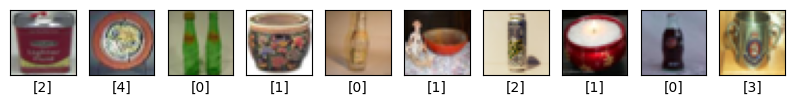

In [8]:
# Plot few samples from images from the TESTING DATASET
plt.figure(figsize=(10,2))
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(test_images[i], cmap=plt.cm.binary)
  plt.xlabel(test_labels[i])

d:\python\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 15, 15, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 6, 6, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 2, 2, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 227,781 (889.77 KB)

 Trainable params: 226,821 (886.02 KB)

 Non-trainable params: 960 (3.75 KB)

Epoch 1/1000
71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.2569 - loss: 5.7155 - val_accuracy: 0.3640 - val_loss: 4.6681
Epoch 2/1000
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.3464 - loss: 5.0854 - val_accuracy: 0.3600 - val_loss: 4.3776
Epoch 3/1000
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.3840 - loss: 4.6574 - val_accuracy: 0.4320 - val_loss: 4.0089
Epoch 4/1000
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4096 - loss: 4.3276 - val_accuracy: 0.4520 - val_loss: 3.7926
Epoch 5/1000
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.4432 - loss: 4.0022 - val_accuracy: 0.4840 - val_loss: 3.5722
Epoch 6/1000
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.4702 - loss: 3.7764 - val_accuracy: 0.5680 - val_loss: 3.3068
Epoch 7/1000
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5007 - loss: 3.4608 - val_accuracy: 0.5880 - val_loss: 3.1258
Epoch 8/1000
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.5231 - loss: 3.2734 - val_accu

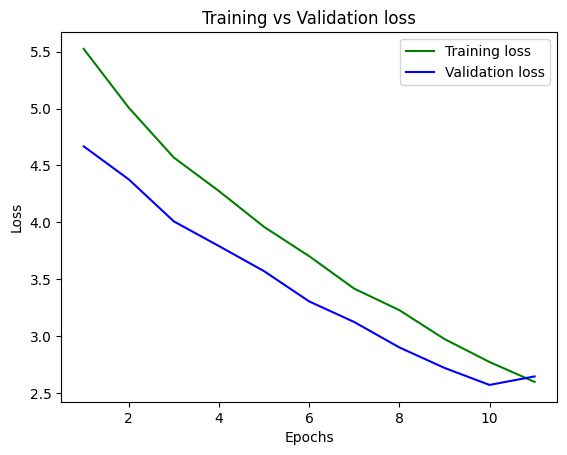

In [9]:
# Build the model
model = tf.keras.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.4))  

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.4))  

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.4))  

model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))  

model.add(Dense(len(uniq_fineClass), activation='softmax'))

model.summary()

# Use Adam optimizer with a lower learning rate
optimizer = Adam(learning_rate=0.0005)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=1, restore_best_weights=True)

metricInfo = model.fit(train_images, train_labels, epochs=1000, validation_split=0.1, callbacks=[early_stopping]) #callbacks=[early_stopping]

loss = metricInfo.history['loss']
val_loss = metricInfo.history['val_loss']
epochs = range(1, len(loss) + 1)

# Define a callback to save the best model during training
checkpoint_filepath = 'C:\\Users\\Zamskie\\Documents\\jason 3rd year\\2ND SEM\\cpe emerging\\bestModel\\best_model2.keras'
model_checkpoint = ModelCheckpoint(
    checkpoint_filepath,
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

# Train the model with the ModelCheckpoint callback
history = model.fit(
    train_images,
    train_labels,
    epochs=1000,  # Adjust the number of epochs
    validation_split=0.1,
    callbacks=[model_checkpoint]
)

# Load the best model
#best_model = tf.keras.models.load_model(checkpoint_filepath)

# Evaluate the model or use it for predictions
#test_loss, test_accuracy = best_model.evaluate(test_images, test_labels)
#print('Test Accuracy of the Best Model:', test_accuracy)

plt.clf()
plt.plot(epochs, loss, 'g-', label="Training loss")
plt.plot(epochs, val_loss, 'b-', label='Validation loss')
plt.title('Training vs Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [10]:
# Test the model
str_class = ['bottles', 'bowl', 'cans', 'cups', 'plates']

print(test_images.shape)
print("Class in the testing image: {}".format(np.unique(test_labels)))
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Total number of testing image: {}'.format(len(test_images)))
print('Test accuracy:', test_acc)

# Another way to test using "prediction" method
classification = model.predict(test_images)
print('\nDisplaying prediction of the first test input image: {}'.format(classification[0]))

# get the index of the maximum probability in the classification[0] result
max_prob_idx = np.argmax(classification[0])
print('Predicted class: {}--{}'.format(max_prob_idx, str_class[max_prob_idx]))
idx = test_labels[0]
print('True class: {} -- {}'.format(idx[0], str_class[idx[0]]))

# Evaluate the model on a per-class basis
y_true = test_labels
y_pred = np.argmax(classification, axis=1)

report = classification_report(y_true, y_pred, target_names=str_class)
print('\nClassification Report:\n', report)

(500, 32, 32, 3)
Class in the testing image: [0 1 2 3 4]
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7549 - loss: 1.2457
Total number of testing image: 500
Test accuracy: 0.75
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step

Displaying prediction of the first test input image: [1.1011270e-07 4.6617166e-05 9.9909389e-01 8.5915934e-04 2.7132020e-07]
Predicted class: 2--cans
True class: 2 -- cans

Classification Report:
               precision    recall  f1-score   support

     bottles       0.84      0.84      0.84       100
        bowl       0.69      0.59      0.63       100
        cans       0.70      0.81      0.75       100
        cups       0.84      0.76      0.80       100
      plates       0.69      0.75      0.72       100

    accuracy                           0.75       500
   macro avg       0.75      0.75      0.75       500
weighted avg       0.75      0.75      0.75       500

